# Federal Bank Statement Analysis
The aim of this notebook is to model topics from the documents provided by the federal banks to the public of the following countries:

* Chile
* South Africa
* India

In [1]:
library(tictoc)
library(tidyverse)
library(tidytext)
library(topicmodels)
library(plotly)
library(tm)
library(lubridate)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Warning message:
“package ‘tidyr’ was built under R version 3.4.2”Warning message:
“package ‘purrr’ was built under R version 3.4.2”Warning message:
“package ‘dplyr’ was built under R version 3.4.2”Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Warning message:
“package ‘tidytext’ was built under R version 3.4.3”Warning message:
“package ‘topicmodels’ was built under R version 3.4.2”Warning message:
“package ‘plotly’ was built under R version 3.4.1”
Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout

Warning message:
“package ‘tm’ was built under R version 3.4.3”Loading require

In [55]:
OWN_STOP_WORDS = c("In", "cent", "4,5", "5,7", "r1290", "2,3", "1,6", "16,5", "93")
TOP_WORDS_TO_GRAPH = 12
NUM_TOPICS = 20
YEARS = 2013:2018
NUM_DOCUMENTS = 31

In [32]:
setwd("/Users/charlvanschoor/Documents/GitHub/Viegi/src")
writeLines(paste0("Running 1_tidying.R"))

Running 1_tidying.R


In [4]:
mpc_extract <- 0
for (i in YEARS) {
  i <- as.tibble(read_csv(paste0("~/Documents/GitHub/Viegi/src/data/text_extract/", i,"/mpc_text_extract_", i,".csv")))
  mpc_extract <- rbind(mpc_extract, i) %>% filter(!is.na(bank), bank != 0)
}
print(mpc_extract)

Parsed with column specification:
cols(
  bank = col_character(),
  month = col_integer(),
  date = col_character(),
  mpc_communication = col_character()
)
Parsed with column specification:
cols(
  bank = col_character(),
  month = col_integer(),
  date = col_character(),
  mpc_communication = col_character()
)
Parsed with column specification:
cols(
  bank = col_character(),
  month = col_integer(),
  date = col_character(),
  mpc_communication = col_character()
)
Parsed with column specification:
cols(
  bank = col_character(),
  month = col_integer(),
  date = col_character(),
  mpc_communication = col_character()
)
Parsed with column specification:
cols(
  bank = col_character(),
  month = col_integer(),
  date = col_character(),
  mpc_communication = col_character()
)
Parsed with column specification:
cols(
  bank = col_character(),
  month = col_integer(),
  date = col_character(),
  mpc_communication = col_character()
)
Warning message in grepl("^[^[:blank:][:cntrl:]\"](?:|[^[:

# A tibble: 31 x 4
   bank  month date       mpc_communication                                    
   <chr> <dbl> <chr>      <chr>                                                
 1 SARB   1.00 24/01/2013 "Issued by Gill Marcus, Governor of the South Africa…
 2 SARB   3.00 20/03/2013 "South African Reserve Bank STATEMENT OF THE MONETAR…
 3 SARB   5.00 23/05/2013 "Issued by Gill Marcus, Governor of the South Africa…
 4 SARB   7.00 18/07/2013 "South African Reserve Bank STATEMENT OF THE MONETAR…
 5 SARB   9.00 21/11/2013 "South African Reserve Bank STATEMENT OF THE MONETAR…
 6 SARB  11.0  19/09/2013 "South African Reserve Bank STATEMENT OF THE MONETAR…
 7 SARB   1.00 29/01/2014 "South African Reserve Bank STATEMENT OF THE MONETAR…
 8 SARB   3.00 27/03/2014 "South African Reserve Bank STATEMENT OF THE MONETAR…
 9 SARB   5.00 22/05/2014 "South African Reserve Bank STATEMENT OF THE MONETAR…
10 SARB   7.00 17/07/2014 "South African Reserve Bank STATEMENT OF THE MONETAR…
# ... with 21 more ro

In [5]:
mpc_extract_clean <- mpc_extract %>%
  mutate(nr = 1:length(bank),
         bank = as.factor(bank),
         month = as.integer(month),
         mpc_communication = as.character(mpc_communication)) %>%
  select(nr, everything()) 
print(mpc_extract_clean)

Warning message in grepl("^[^[:blank:][:cntrl:]\"](?:|[^[:cntrl:]\"]*[^[:blank:][:cntrl:]\"])$", :
“input string 1 is invalid UTF-8”Warning message in grepl("^[^[:blank:][:cntrl:]\"](?:|[^[:cntrl:]\"]*[^[:blank:][:cntrl:]\"])$", :
“input string 2 is invalid UTF-8”Warning message in grepl("^[^[:blank:][:cntrl:]\"](?:|[^[:cntrl:]\"]*[^[:blank:][:cntrl:]\"])$", :
“input string 3 is invalid UTF-8”Warning message in grepl("^[^[:blank:][:cntrl:]\"](?:|[^[:cntrl:]\"]*[^[:blank:][:cntrl:]\"])$", :
“input string 4 is invalid UTF-8”Warning message in grepl("^[^[:blank:][:cntrl:]\"](?:|[^[:cntrl:]\"]*[^[:blank:][:cntrl:]\"])$", :
“input string 5 is invalid UTF-8”

# A tibble: 31 x 5
      nr bank   month date       mpc_communication                             
   <int> <fctr> <int> <chr>      <chr>                                         
 1     1 SARB       1 24/01/2013 "Issued by Gill Marcus, Governor of the South…
 2     2 SARB       3 20/03/2013 "South African Reserve Bank STATEMENT OF THE …
 3     3 SARB       5 23/05/2013 "Issued by Gill Marcus, Governor of the South…
 4     4 SARB       7 18/07/2013 "South African Reserve Bank STATEMENT OF THE …
 5     5 SARB       9 21/11/2013 "South African Reserve Bank STATEMENT OF THE …
 6     6 SARB      11 19/09/2013 "South African Reserve Bank STATEMENT OF THE …
 7     7 SARB       1 29/01/2014 "South African Reserve Bank STATEMENT OF THE …
 8     8 SARB       3 27/03/2014 "South African Reserve Bank STATEMENT OF THE …
 9     9 SARB       5 22/05/2014 "South African Reserve Bank STATEMENT OF THE …
10    10 SARB       7 17/07/2014 "South African Reserve Bank STATEMENT OF THE …
# ... with 21 more ro

In [6]:
tidy_mpc_extract <- mpc_extract_clean %>%
  unnest_tokens(word, mpc_communication, token = "words", to_lower = T) %>% 
  filter(!word %in% OWN_STOP_WORDS) %>% 
  filter(!word %in% stop_words$word) 
print(tidy_mpc_extract)
str(tidy_mpc_extract)

# A tibble: 43,229 x 5
      nr bank   month date       word    
   <int> <fctr> <int> <chr>      <chr>   
 1     1 SARB       1 24/01/2013 issued  
 2     1 SARB       1 24/01/2013 gill    
 3     1 SARB       1 24/01/2013 marcus  
 4     1 SARB       1 24/01/2013 governor
 5     1 SARB       1 24/01/2013 south   
 6     1 SARB       1 24/01/2013 african 
 7     1 SARB       1 24/01/2013 reserve 
 8     1 SARB       1 24/01/2013 bank    
 9     1 SARB       1 24/01/2013 previous
10     1 SARB       1 24/01/2013 meeting 
# ... with 43,219 more rows
Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	43229 obs. of  5 variables:
 $ nr   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ bank : Factor w/ 1 level "SARB": 1 1 1 1 1 1 1 1 1 1 ...
 $ month: int  1 1 1 1 1 1 1 1 1 1 ...
 $ date : chr  "24/01/2013" "24/01/2013" "24/01/2013" "24/01/2013" ...
 $ word : chr  "issued" "gill" "marcus" "governor" ...


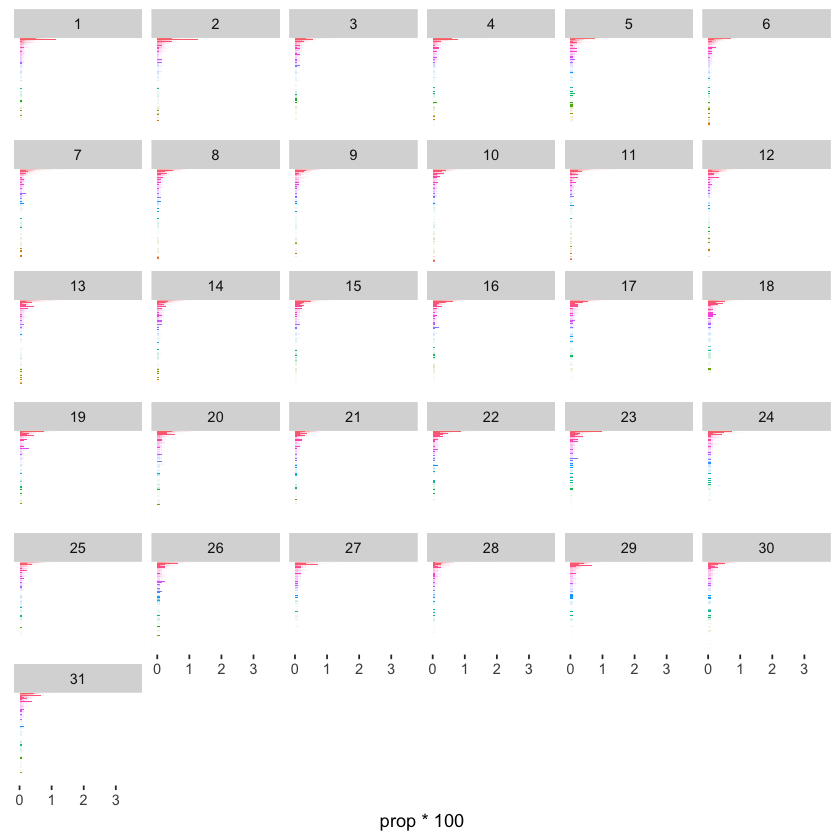

In [7]:
tidy_mpc_extract %>% 
  group_by(word, nr) %>%
  summarise(count = n()) %>% 
  ungroup() %>%
  group_by(nr) %>%
  mutate(prop = count/sum(count)) %>%
  ungroup() %>% 
  arrange(nr, -prop) %>% 
  mutate(word = reorder(word, prop), nr = as.factor(nr)) %>% 
  ggplot() + geom_bar(aes(x = word, y = prop*100, fill = word), stat = "identity",  show.legend = FALSE) +
  coord_flip() + facet_wrap(~ nr) + theme(axis.title.y=element_blank(),
                                          axis.text.y=element_blank(),
                                          axis.ticks.y=element_blank())

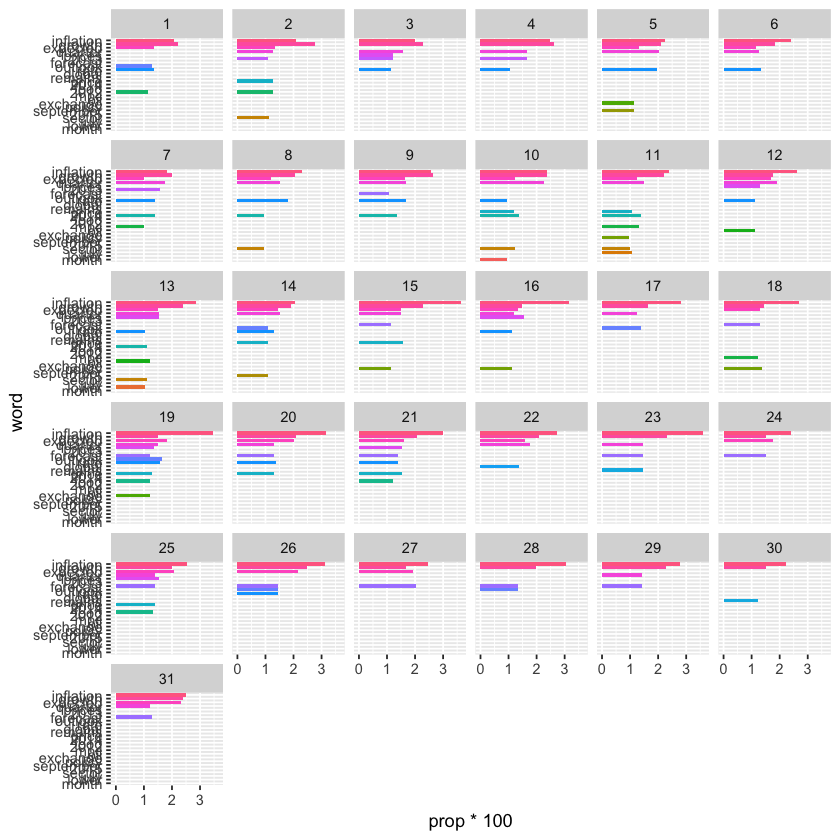

In [8]:
# most common words in each document by percentage of appearance:
#### GRAPH 2
tidy_mpc_extract %>% 
  group_by(word, nr) %>%
  summarise(count = n()) %>% 
  ungroup() %>%
  group_by(nr) %>%
  mutate(prop = count/sum(count)) %>%
  ungroup() %>% 
  filter(count > 15) %>% 
  filter(!(word %in% OWN_STOP_WORDS)) %>%
  arrange(nr, -prop) %>% 
  mutate(word = reorder(word, prop), nr = as.factor(nr)) %>% 
  ggplot() + geom_bar(aes(x = word, y = prop*100, fill = word), stat = "identity",  show.legend = FALSE) +
  coord_flip() + facet_wrap(~ nr) 

In [9]:
# create term document frequencies
mpc_extract_tdf <- tidy_mpc_extract %>%
  group_by(nr, word) %>%
  summarise(n= n())

In [10]:
# the document-term matrix
mpc_extract_dtm = mpc_extract_tdf %>%
  cast_dtm(nr, word, n)
print(mpc_extract_dtm)

<<DocumentTermMatrix (documents: 31, terms: 2906)>>
Non-/sparse entries: 18452/71634
Sparsity           : 80%
Maximal term length: 16
Weighting          : term frequency (tf)


In [56]:
# LDA
mpc_lda = LDA(mpc_extract_dtm, k = NUM_TOPICS)

In [57]:
# getting the beta matrix - P(word|topic)
mpc_topics_beta = tidy(mpc_lda, matrix = "beta")
print(mpc_topics_beta)

# A tibble: 58,120 x 3
   topic term                                                              beta
   <int> <chr>                                                            <dbl>
 1     1 0,1                                                          2.92e⁻²⁵⁷
 2     2 0,1                                                          8.39e⁻²⁴⁴
 3     3 0,1                                                          1.05e⁻  ³
 4     4 0,1                                                          6.66e⁻  ⁴
 5     5 0,1                                                          3.36e⁻  ⁴
 6     6 0,1                                                          5.09e⁻²⁶⁹
 7     7 0,1                                                          4.81e⁻  ⁴
 8     8 0,1                                                          3.54e⁻  ⁴
 9     9 0,1                                                          4.77e⁻  ⁹
10    10 0,1                                                          1.26e⁻  ³
# ... with 58,110

In [58]:
# getting the gamma matrix - P(bank|topic)
mpc_topics_gamma = tidy(mpc_lda, matrix = "gamma")
print(mpc_topics_gamma)

# A tibble: 620 x 3
   document topic      gamma
   <chr>    <int>      <dbl>
 1 1            1 0.00000882
 2 2            1 0.00000832
 3 3            1 0.00000886
 4 4            1 0.00000829
 5 5            1 0.00000870
 6 6            1 0.00000787
 7 7            1 0.00000782
 8 8            1 0.00000747
 9 9            1 0.00000839
10 10           1 0.00000737
# ... with 610 more rows


In [59]:
# graphing top words, by probability, in each topic
# top words
mpc_top_terms <- mpc_topics_beta %>%
  group_by(topic) %>% 
  top_n(TOP_WORDS_TO_GRAPH, beta) %>% 
  ungroup() %>%
  arrange(topic, -beta)
print(mpc_top_terms)

# A tibble: 241 x 3
   topic term         beta
   <int> <chr>       <dbl>
 1     1 growth    0.0267 
 2     1 inflation 0.0265 
 3     1 expected  0.0222 
 4     1 forecast  0.0142 
 5     1 quarter   0.0120 
 6     1 price     0.0110 
 7     1 remains   0.0107 
 8     1 2017      0.0105 
 9     1 2019      0.0104 
10     1 2018      0.00960
# ... with 231 more rows


In [60]:
# bottom words
mpc_bottom_terms <- mpc_topics_beta %>%
  group_by(topic) %>% 
  top_n(TOP_WORDS_TO_GRAPH, -beta) %>% 
  ungroup() %>%
  arrange(topic, -beta)
print(mpc_bottom_terms)

# A tibble: 240 x 3
   topic term                                                              beta
   <int> <chr>                                                            <dbl>
 1     1 forestry                                                     5.49e⁻²⁹⁴
 2     1 49,1                                                         4.87e⁻²⁹⁴
 3     1 425                                                          3.45e⁻²⁹⁴
 4     1 opportunity                                                  3.29e⁻²⁹⁴
 5     1 weekend                                                      3.13e⁻²⁹⁴
 6     1 series                                                       2.89e⁻²⁹⁴
 7     1 advantages                                                   1.19e⁻²⁹⁴
 8     1 attached                                                     1.16e⁻²⁹⁴
 9     1 weo                                                          1.12e⁻²⁹⁴
10     1 stem                                                         4.62e⁻²⁹⁵
# ... with 230 more 

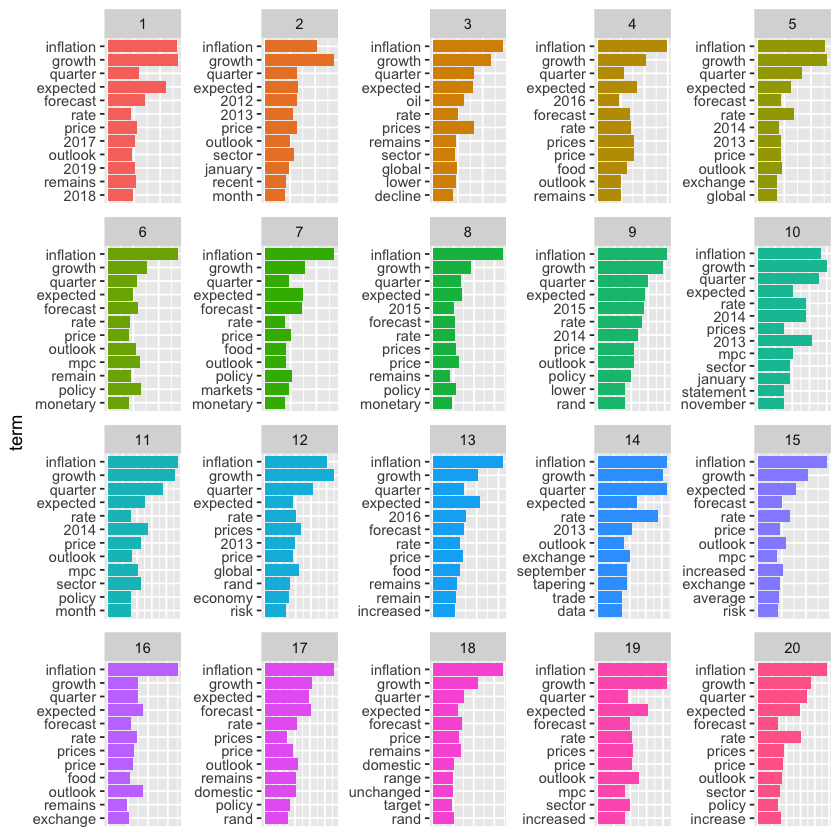

In [61]:
#### GRAPH 3
mpc_top_terms %>% 
  mutate(term = reorder(term, beta)) %>% 
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip() +  theme(axis.title.x=element_blank(),
                        axis.ticks.x=element_blank(),
                        axis.text.x = element_blank())

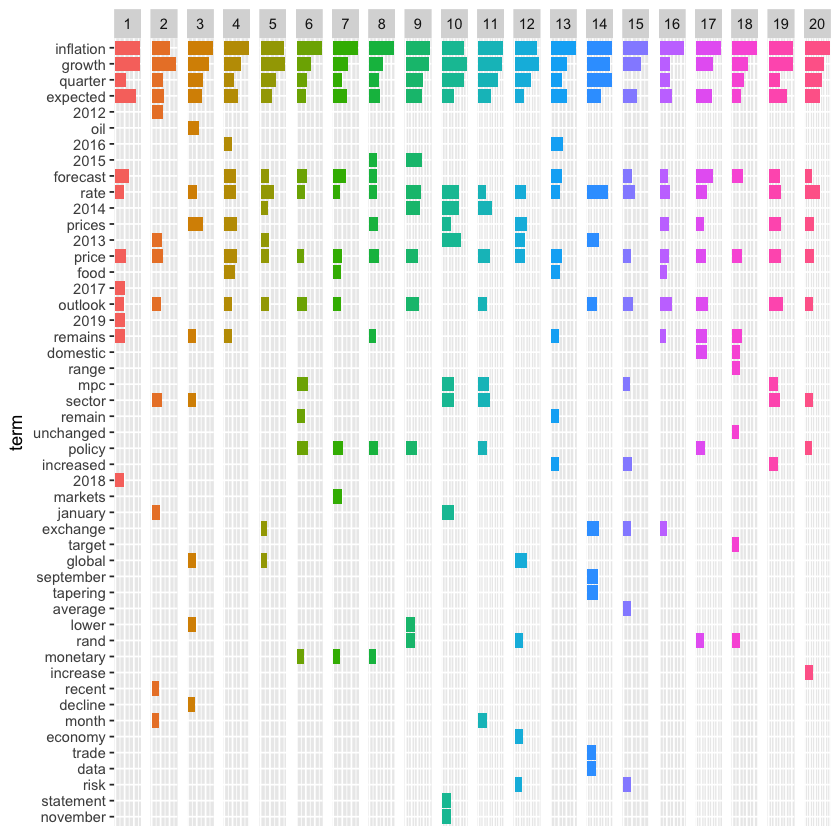

In [62]:
#### GRAPH 4
mpc_top_terms %>% 
  mutate(term = reorder(term, beta)) %>% 
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_grid(~ topic, scales = "free") +
  coord_flip() +  theme(axis.title.x=element_blank(),
                        axis.ticks.x=element_blank(),
                        axis.text.x = element_blank())

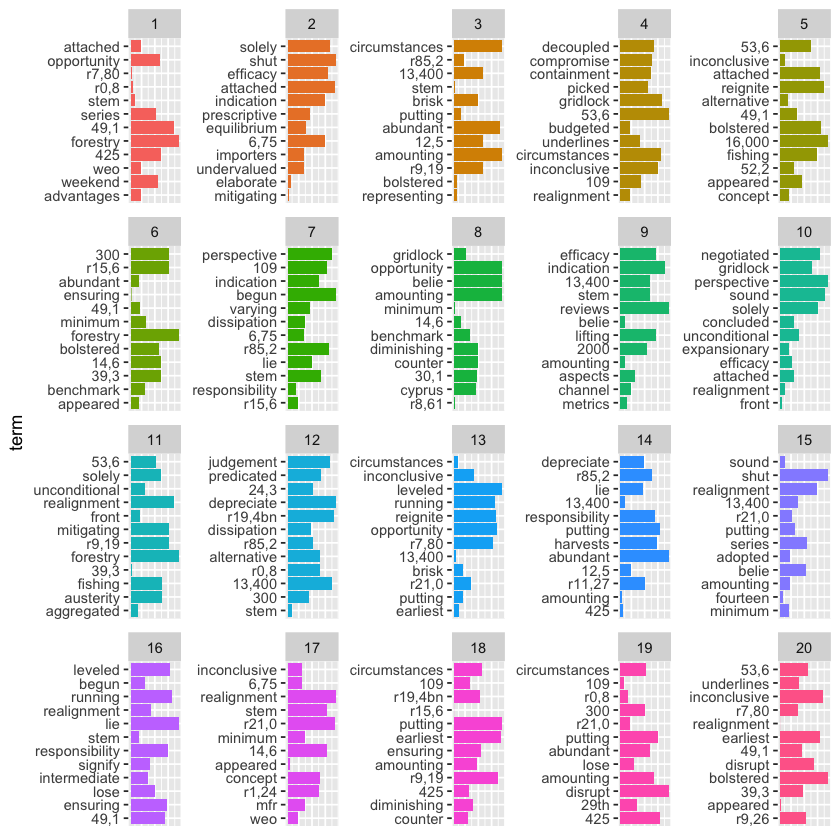

In [63]:
#### GRAPH 3
mpc_bottom_terms %>% 
  mutate(term = reorder(term, beta)) %>% 
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip() +  theme(axis.title.x=element_blank(),
                        axis.ticks.x=element_blank(),
                        axis.text.x = element_blank())

In [64]:
#get topic distributions per document - which top 3 topic does each document likely belong to
mpc_top_documents <- mpc_topics_gamma %>%
  group_by(document) %>% 
  top_n(10, gamma) %>%
  ungroup() %>% 
  mutate(topic = as.factor(topic),
         document = factor(document, levels = c(1:NUM_DOCUMENTS))) %>% 
  arrange(document, topic, -gamma)
print(mpc_top_documents)

# A tibble: 310 x 3
   document topic       gamma
   <fctr>   <fctr>      <dbl>
 1 1        2      0.00000882
 2 1        5      0.00000882
 3 1        8      0.00000882
 4 1        10     0.00000882
 5 1        11     0.00000882
 6 1        13     0.00000882
 7 1        14     0.00000882
 8 1        17     0.00000882
 9 1        19     1.000     
10 1        20     0.00000882
# ... with 300 more rows


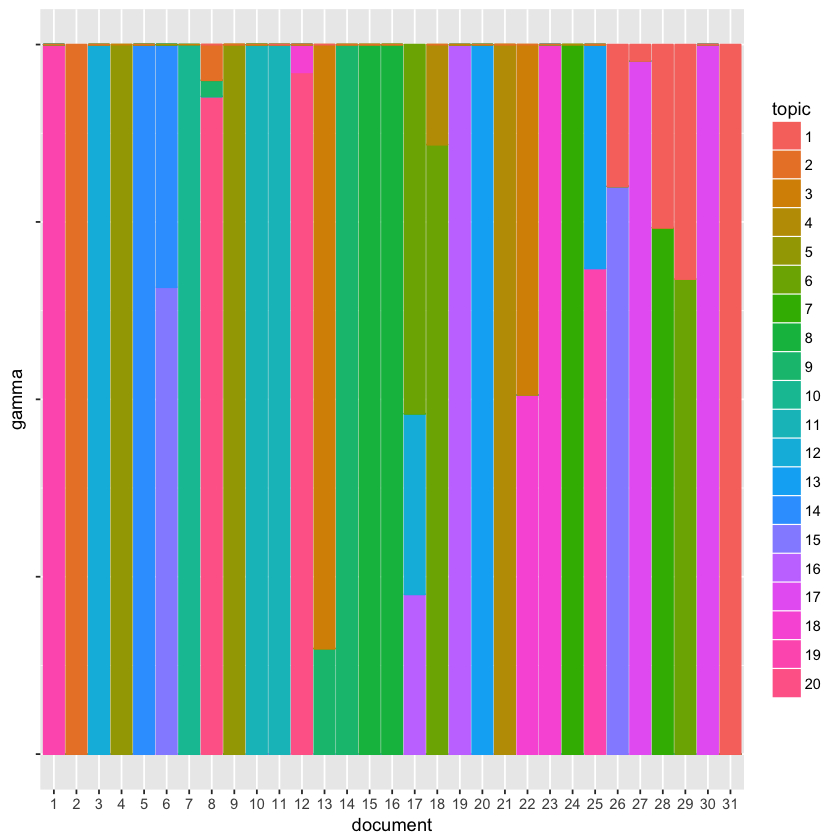

In [65]:
#### GRAPH 5
mpc_top_documents %>% 
  ggplot() + geom_col(aes(x=document, y=gamma, col=topic, fill=topic)) +
  theme(axis.text.y = element_blank()) 

Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], 

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: ret

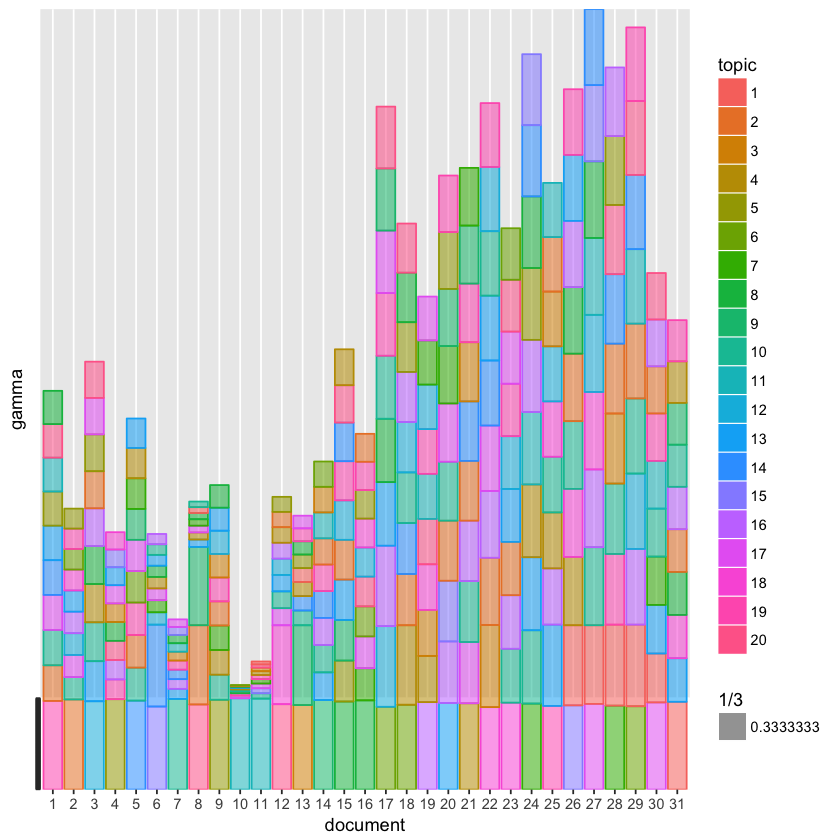

In [66]:
#### GRAPH 6
mpc_top_documents %>% 
  mutate(gamma = reorder(gamma, document)) %>% 
  ggplot() + geom_col(aes(x=document, y=gamma, col=topic, fill=topic, alpha = 1/3)) +
  theme(axis.text.y = element_blank()) 